In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')
data.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [3]:
import numpy as np

X = np.array(data.loc[: , data.columns != 'output'])
Y = np.array(data['output'])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 32)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
x_train_scaled = scaler.fit_transform(x_train)

In [9]:
x_test_scaled = scaler.transform(x_test)

In [16]:
class NeuralNetwork :
    def __init__(self, LR, x_train, y_train, x_test, y_test):
        self.w = np.random.randn(x_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.x_train = x_train   
        self.x_test = x_test                
        self.y_train = y_train   
        self.y_test = y_test                
        self.Loss_train = []                
        self.Loss_test = []  
        
    def activation(self, x):
        # sigmoid
        return 1 / (1 + np.exp(-x) )
    
    def derivative_activation(self, x):
        return self.activation(x) * (1 - self.activation(x))
    
    def forward(self, x):
        hidden_layer_1 = np.dot(x , self.w) + self.b
        activation_1 = self.activation(hidden_layer_1)
        return activation_1
    
    def backward(self, x, y_true):
        hidden_layer_1 = np.dot(x , self.w) + self.b
        y_pred = self.forward(x)
        dlosses_dpred = 2 * (y_pred - y_true)
        d_hidden_1 = self.derivative_activation(hidden_layer_1)
        dhidden_db = 1
        dhidden_dw = x
        
        dlosses_db = dlosses_dpred * d_hidden_1 * dhidden_db
        dlosses_dw = dlosses_dpred * d_hidden_1 * dhidden_dw
        return dlosses_db, dlosses_dw
    
    def optimizer(self, dl_db, dl_dw):
        self.b = self.b - dl_db * self.LR
        self.w = self.w - dl_dw * self.LR
        
    def train(self, Iterations):
        for i in range(Iterations):
            random_pos = np.random.randint(len(self.x_train))
            
            # Step 1 : Forward pass
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.x_train[random_pos])
            
            # Step 2 : Calculate training losses
            Losses = np.square(y_train_pred - y_train_true)
            self.Loss_train.append(Losses)
            
            # Step 3 : Updating weights
            dl_db, dl_dw = self.backward(self.x_train[random_pos], self.y_train[random_pos])
            self.optimizer(dl_db, dl_dw)
            
            # Step 4 : Calculating error for test data
            L_sum = 0
            for j in range(len(self.x_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.x_test[j])
                L_sum += np.square(y_true - y_pred)
            self.Loss_test.append(L_sum)
        return "Trained successfully"

In [17]:
LR = .1
ITERATIONS = 1000

model = NeuralNetwork(LR = LR, x_train = x_train_scaled, x_test = x_test_scaled, y_train = y_train, y_test = y_test)

In [18]:
model.train(ITERATIONS)

'Trained successfully'

In [20]:
import seaborn as sns

<AxesSubplot:>

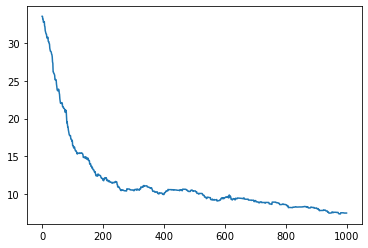

In [21]:
sns.lineplot(x = list(range(len(model.Loss_test))) , y = model.Loss_test)

In [24]:
total = x_test_scaled.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(model.forward(x_test_scaled[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0

In [25]:
Accuracy = correct / total
Accuracy

0.8360655737704918

In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

<AxesSubplot:>

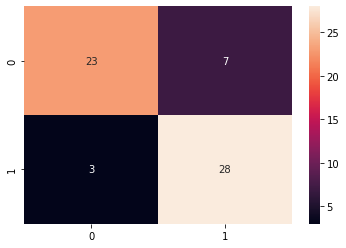

In [46]:
sns.heatmap(confusion_matrix(y_true = y_test , y_pred = y_preds), annot=True)

In [49]:
precision = precision_score(y_test, y_preds, zero_division=0)
recall = recall_score(y_test, y_preds, zero_division=0)
print('Precision : ', precision)
print('Recall : ', recall)

Precision :  0.8
Recall :  0.9032258064516129
